In [1]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
Iris_data=iris.drop(['Id','Species'],axis=1)

In [5]:
Iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
wcss=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(Iris_data)
    wcss.append(kmeans.inertia_)

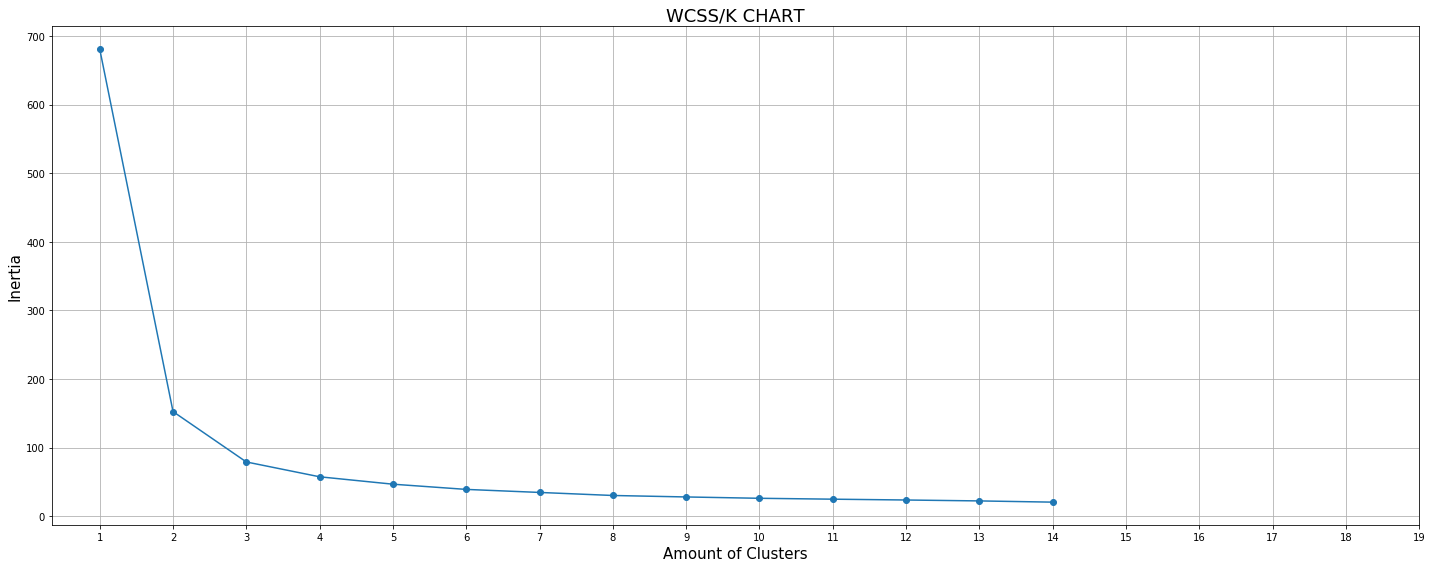

In [7]:
#Kchart

plt.figure(figsize=(20,8))
plt.title("WCSS/K CHART",fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=15)
plt.ylabel("Inertia",fontsize=15)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [8]:
#clustering the value
kmeans=KMeans(n_clusters=3)
kmeans.fit(Iris_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
k_predict=kmeans.predict(Iris_data)
k_predict


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [10]:
Iris_data=pd.DataFrame(Iris_data)
Iris_data["Label"]=k_predict
Iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


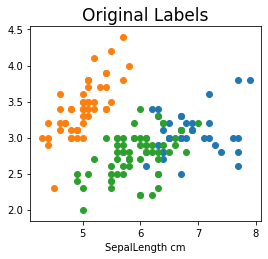

In [11]:
#scatterplot

plt.figure(figsize=(24,4))
plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=17)
plt.xlabel("SepalLength cm")
plt.scatter(Iris_data.SepalLengthCm[Iris_data.Label==0],Iris_data.SepalWidthCm[Iris_data.Label==0])
plt.scatter(Iris_data.SepalLengthCm[Iris_data.Label==1],Iris_data.SepalWidthCm[Iris_data.Label==1])
plt.scatter(Iris_data.SepalLengthCm[Iris_data.Label==2],Iris_data.SepalWidthCm[Iris_data.Label==2])
plt.subplots_adjust(top=0.8)
plt.show()

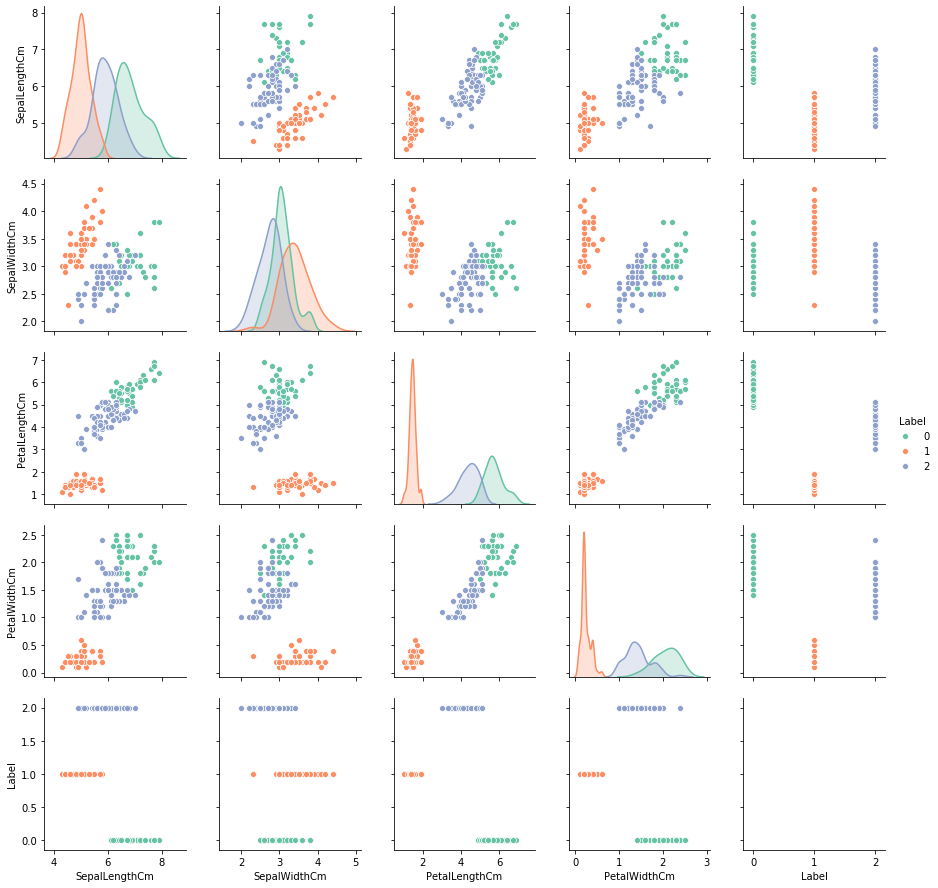

In [12]:
sns.pairplot(data=Iris_data,hue="Label",palette="Set2")
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [14]:
silhouette_score(Iris_data,k_predict)

0.6849364629960383

In [15]:
X=Iris_data.iloc[:,:-1]
Y=Iris_data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [16]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
ypred=knn.predict(x_test)
ypred

array([2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1])

In [18]:
classification_report(y_test,ypred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         3\n           1       1.00      1.00      1.00        11\n           2       1.00      1.00      1.00        16\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [19]:
accuracy_score(y_test,ypred)

1.0

In [20]:
confusion_matrix(y_test,ypred)

array([[ 3,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 16]], dtype=int64)

In [21]:
knn.score(x_test,ypred)

1.0

In [22]:
Iris_data["Label"].replace({0:"Setosa",1:"Versicolor",2:"Virginica"},inplace=True)
Iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Versicolor
1,4.9,3.0,1.4,0.2,Versicolor
2,4.7,3.2,1.3,0.2,Versicolor
3,4.6,3.1,1.5,0.2,Versicolor
4,5.0,3.6,1.4,0.2,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Setosa
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Setosa
148,6.2,3.4,5.4,2.3,Setosa
